 GenAI & Machine Learning Bootcamp 2025 - Full Time 2025 - PSTB Application for Data Analysis NumPy Advanced NumPy, Pandas & Matplotlib Integration
NumPy, Pandas & Matplotlib Integration
Last Updated: November 20th, 2024

Objective:
Apply your knowledge of NumPy, Pandas, and Matplotlib to analyze a real-world dataset. Utilize advanced statistical functions and array operations in NumPy, and integrate these with Pandas for data manipulation and Matplotlib for visualization.



Dataset:
You will work with the “Global Power Plant Database” provided by the World Resources Institute, which contains detailed information about power plants worldwide. This dataset is ideal for practicing array manipulations, statistical analysis, and time series data handling.

Download the dataset here.

or you can download it directly

Here.



Tasks:
Data Import and Cleaning:

Import the dataset using Pandas.
Identify missing values and handle them appropriately.
Use NumPy to convert relevant columns to numerical types if necessary.
Exploratory Data Analysis:

Utilize Pandas to summarize key statistics (mean, median, standard deviation) for numerical columns.
Explore the distribution of power plants by country and fuel type.
Statistical Analysis:

Perform a statistical analysis of power output by fuel type using NumPy’s statistical functions.
Use hypothesis testing to determine if the mean power output differs significantly between different fuel types.
Time Series Analysis:

If the dataset includes time-related data (like year of establishment), use NumPy to analyze trends over time.
Explore how the mix of fuel types for power generation has evolved over the years.
Advanced Visualization:

Create visualizations using Matplotlib and Seaborn to illustrate your findings.
Consider plotting the geographical distribution of power plants using latitude and longitude data, if available.
Matrix Operations in Real-World Context:

Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).
Discuss the relevance of eigenvectors and eigenvalues in this context.
Integrating NumPy with Pandas and Matplotlib:

Show how NumPy can be used to enhance data manipulation in Pandas and data visualization in Matplotlib.
Provide examples, such as using NumPy arrays for complex filtering in Pandas or for creating sophisticated plots in Matplotlib.

Duration & Difficulty
Duration (approx)	Difficulty
60 minutes	⭐⭐


Submit your Daily Challenge
Prepare a report including your code, findings, and visualizations. Discuss how NumPy, Pandas, and Matplotlib were used in your analysis, and present any interesting insights you discovered about the global power plant landscape.

Don’t forget to push to Github

In [ ]:
# Task 1. Data import & cleaning :

import pandas as pd
import numpy as np

# 1.1 "global_power_plant_database.csv" dataset Import :
df = pd.read_csv("global_power_plant_database.csv")

# 1.2 Display of 5 upper lines
print(df.head())

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
# 1.3 Identification of missing values :
df.isnull().sum()
print(df.isnull().sum())

# 1.4 Handling Missing Values
    # Fill with the mean:
df['capacity_mw'].fillna(df['capacity_mw'].mean(), inplace=True)

In [19]:
# or complete critical columns :
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 25180 to 34431
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         55 non-null     object 
 1   country_long                    55 non-null     object 
 2   name                            55 non-null     object 
 3   gppd_idnr                       55 non-null     object 
 4   capacity_mw                     55 non-null     float64
 5   latitude                        55 non-null     float64
 6   longitude                       55 non-null     float64
 7   primary_fuel                    55 non-null     object 
 8   other_fuel1                     55 non-null     object 
 9   other_fuel2                     55 non-null     object 
 10  other_fuel3                     55 non-null     object 
 11  commissioning_year              55 non-null     float64
 12  owner                           55 n

In [27]:
    # or drop the rows:
df.dropna(subset=['country_long', 'other_fuel1', 'other_fuel2', 'other_fuel3','owner', 'url','wepp_id','year_of_capacity_data','generation_gwh_2013','generation_gwh_2014'], inplace=True)

In [28]:
# 1.5 Numerical format conversion when needed :
df["capacity_mw"] = df["capacity_mw"].astype(float)

# As a result, you get a cleanned DataFrame ready for analyse.

In [ ]:
# Task 2. Exploratory Data Analysis: 
    # Utilize Pandas to summarize key statistics (mean, median, standard deviation) for numerical columns.
    # Explore the distribution of power plants by country and fuel type.

import numpy as np
from scipy import stats

    #Test Statistics with skimpy 
!pip install skimpy
from skimpy import skim

In [67]:
# Fuel tupe concatenate :
    # 1. Concatenate all fuel type columns into one single "fuel_type" :
fuel_cols = ['primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3']
fuel_type_series = pd.concat([df[col] for col in fuel_cols], axis=0, ignore_index=True)

    # 2. Remove missing values :
fuel_type_series.dropna(inplace=True)

    # 3. Count occurrencies for each fuel type :
fuel_type_counts = fuel_type_series.value_counts()

    # 4. Display results
print(fuel_type_counts)

Gas        50
Waste      44
Oil        36
Coal       31
Biomass    30
Other       9
Petcoke     8
Solar       5
Hydro       4
Wind        3
Name: count, dtype: int64


In [ ]:
# Average capacities per fuel type : 
grouped = df.groupby("fuel_type_counts")["capacity_mw"].mean()
print(grouped)

In [61]:
# Transform fuel columns to long format :
fuel_cols = ['primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3']
fuel_long = df.melt(value_vars=fuel_cols, value_name='fuel_type')
fuel_long.dropna(subset=['fuel_type'], inplace=True)

# Count occurencies for each fuel type 
fuel_counts = fuel_long['fuel_type'].value_counts()
print(fuel_counts)

fuel_type
Gas        50
Waste      44
Oil        36
Coal       31
Biomass    30
Other       9
Petcoke     8
Solar       5
Hydro       4
Wind        3
Name: count, dtype: int64


In [62]:
# Split per Fuel type :
fuel_types = set(
    pd.concat([df[col].dropna() for col in ['primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3']])
)
print(sorted(fuel_types))
print(fuel_types)


['Biomass', 'Coal', 'Gas', 'Hydro', 'Oil', 'Other', 'Petcoke', 'Solar', 'Waste', 'Wind']
{'Waste', 'Wind', 'Hydro', 'Gas', 'Other', 'Petcoke', 'Solar', 'Coal', 'Biomass', 'Oil'}


In [40]:
# Split per country :
country_distribution = df['country'].value_counts()
print(country_distribution.head(10))

country
USA    55
Name: count, dtype: int64


In [ ]:
# Task 2. Exploratory Data Analysis: 

# 2.1 - key statistics (mean, median, standard deviation) for numerical columns.
stats = df[["capacity_mw"]].agg(["mean", "median", "std"])
print(stats)

# 2.2 Split per country & fuel type
print(df["country"].value_counts().head(10))
print(df["fuel_types"].value_counts())


In [ ]:
# Task 3. Statistical Analysis: 
    # Perform a statistical analysis of power output by fuel type using NumPy’s statistical functions.
    # Use hypothesis testing to determine if the mean power output differs significantly between different fuel types.

    # 3.1 Average capacities per fuel type :
grouped = df.groupby("fuel_type")["capacity_mw"].mean()
print(grouped)

In [ ]:
# Task 3. Statistical Analysis: 
    # Perform a statistical analysis of power output by fuel type using NumPy’s statistical functions.
    # Use hypothesis testing to determine if the mean power output differs significantly between different fuel types.

    # 3.2 Hypothesis Test : difference between two fuel types :
coal = df[df["fuel_type"] == "Coal"]["capacity_mw"].values
gas  = df[df["fuel_type"] == "Gas"]["capacity_mw"].values

In [ ]:
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(Coal, gas, equal_var=False)
print("t =", t_stat, "; p-value =", p_val)

In [77]:
#Time Series Analysis: 
    # If the dataset includes time-related data (like year of establishment), use NumPy to analyze trends over time.
    # Explore how the mix of fuel types for power generation has evolved over the years.

    # 4.1 Nombre d'installations par année
annual = df["commissioning_year"].value_counts().sort_index()
print(annual.head())

commissioning_year
1950.882353    1
1951.380282    1
1954.881356    1
1956.565421    1
1959.176471    1
Name: count, dtype: int64


In [ ]:
# 4.2 Évolution du mix énergétique
fuel_time = df.groupby("commissioning_year")["fuel_type"].value_counts().unstack(fill_value=0)
print(fuel_time.head())

In [ ]:
# 5. Advanced Visualization:
    # Create visualizations using Matplotlib and Seaborn to illustrate your findings.
    # Consider plotting the geographical distribution of power plants using latitude and longitude data, if available.

import matplotlib.pyplot as plt
import seaborn as sns

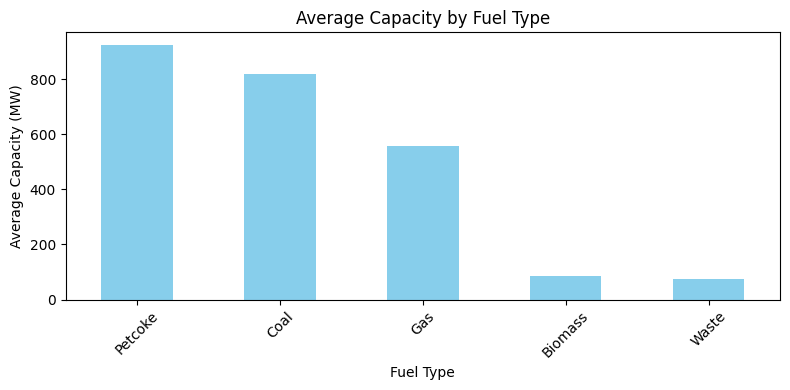

In [ ]:
# 5.1. Regrouper par type de carburant principal et calculer la moyenne de capacité
grouped = df.groupby('primary_fuel')['capacity_mw'].mean().sort_values(ascending=False)

# 5.2. Tracer le graphique
grouped.plot(kind="bar", figsize=(8, 4), color='skyblue')
plt.title("Average Capacity by Fuel Type")
plt.ylabel("Average Capacity (MW)")
plt.xlabel("Fuel Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

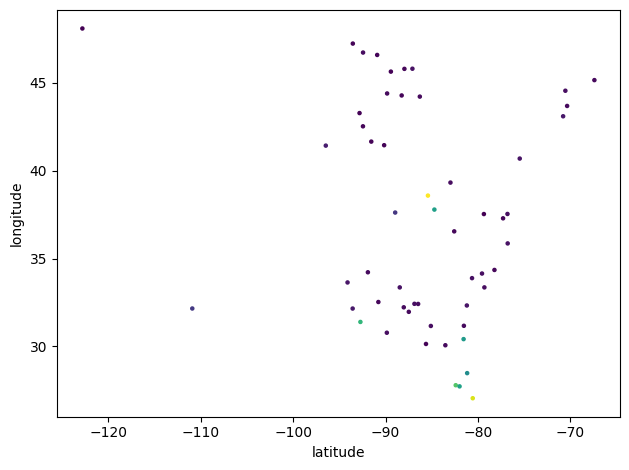

In [86]:
# Cartography option : 
plt.scatter(df["longitude"], df["latitude"], c=df["capacity_mw"], cmap="viridis", s=5) 
plt.ylabel("longitude")
plt.xlabel("latitude")
plt.tight_layout()


In [ ]:
#6. Matrix Operations in Real-World Context:
    # Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).
    # Discuss the relevance of eigenvectors and eigenvalues in this context.

# Ex : capacity matrix vs year :
    # Encoding years and capacities for creating a little matrix
years = df["commissioning_year"].unique()[:5]
mat = []
for y in years:
    mat.append(df[df["commissioning_year"] == y]["capacity_mw"].head(5).values)
mat = np.array(mat).astype(float)  # forme (5x5)

    # Calculating eigenvectors and eigenvalues 
    
    # ??

In [90]:
# Integrating NumPy with Pandas and Matplotlib: 
    # Show how NumPy can be used to enhance data manipulation in Pandas and data visualization in Matplotlib.
    # Provide examples, such as using NumPy arrays for complex filtering in Pandas or for creating sophisticated plots in Matplotlib.

# Example : Identify gas or coal capacities which exceed median ones through advanced filter with NumPy

import numpy as np
import pandas as pd

median_capacity = np.median(df['capacity_mw'].dropna())
mask = (df['primary_fuel'].isin(['Gas', 'Coal'])) & (df['capacity_mw'] > median_capacity)
filtered_df = df[mask]

print(filtered_df[['name', 'primary_fuel', 'capacity_mw']].head())

# Comments : NumPy enables quick filtering based on complex mathematical or statistical conditions.

                                     name primary_fuel  capacity_mw
25527                            Big Bend         Coal       1903.5
27246                           E W Brown          Gas       1454.6
28360   H Wilson Sundt Generating Station          Gas        434.9
28963  International Paper Riverdale Mill          Gas        104.2
29721                          Lon Wright         Coal        213.2
